# Text Classification NLP Model on Coronavirus Timeframe

## Flow of the project or outline:
### 1. Download and Explore the dataset

In [1]:
# We use pandas for exploring the data that is already been downloaded
import pandas as pd
raw_df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1') # here we have to use the 'latin' encoding because of some languages barrier!
raw_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [2]:
# It looks like we have 41,157 rows and 6 columns, let's explore more into it.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [3]:
#Let's see in how many classes our sentiments are divided 
raw_df['Sentiment'].nunique()

5

In [4]:
# value of the individual sentiments.
raw_df.Sentiment.value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

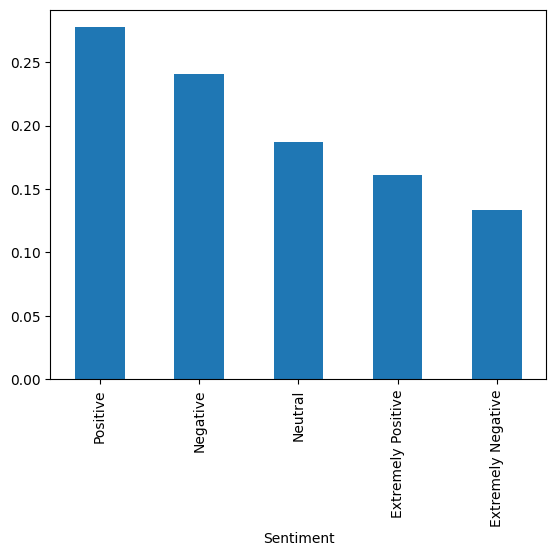

In [5]:
# Visualizing the distribution of the Sentiments.
raw_df.Sentiment.value_counts(normalize=True).plot(kind='bar')

### 2. Apply Text Pre-processing techniques.

####  1. Tokenization - Splitting a document into words and separators.


In [6]:
# Tweets of the people...
raw_df.OriginalTweet[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [7]:
# Here we use the nltk library for performing the task of tokenization..
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt_tab')
r1 = "@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8"
r1_tok = word_tokenize(r1)
r1_tok

['@',
 'MeNyrbie',
 '@',
 'Phil_Gahan',
 '@',
 'Chrisitv',
 'https',
 ':',
 '//t.co/iFz9FAn2Pa',
 'and',
 'https',
 ':',
 '//t.co/xX6ghGFzCC',
 'and',
 'https',
 ':',
 '//t.co/I2NlzdxNo8']

#### 2. Stop  Word Removal - Removing the commonly occuring words.

In [8]:
# our step 2 is to remove the stopwords from the text, we again use the nltk library for performing this task..
from nltk.corpus import stopwords
#nltk.download('stopwords')
english_stopwords = stopwords.words('english')
print(", ".join(english_stopwords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

In [9]:
#Helper function for stopwords removal..
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [10]:
# example..
r1_tok_sw = remove_stopwords(r1_tok)
r1_tok_sw 

['@',
 'MeNyrbie',
 '@',
 'Phil_Gahan',
 '@',
 'Chrisitv',
 'https',
 ':',
 '//t.co/iFz9FAn2Pa',
 'https',
 ':',
 '//t.co/xX6ghGFzCC',
 'https',
 ':',
 '//t.co/I2NlzdxNo8']

#### 3. Stemming -  Converting the words into their root words.

In [11]:
# This task can also be done by nltk library..
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = 'english')
r1_tok_sw_stm = [stemmer.stem(word) for word in r1_tok_sw]
r1_tok_sw_stm

['@',
 'menyrbi',
 '@',
 'phil_gahan',
 '@',
 'chrisitv',
 'https',
 ':',
 '//t.co/ifz9fan2pa',
 'https',
 ':',
 '//t.co/xx6ghgfzcc',
 'https',
 ':',
 '//t.co/i2nlzdxno8']

## Implementing Bag of Words Model 

#### 1. Vocabulary Creation using Count Vectorizer.

In [12]:
# In this step, we are creating the vocabulary for our model using the sklearn library..
from  sklearn.feature_extraction.text import CountVectorizer
ex_vectorizer = CountVectorizer() # Making an object..

In [13]:
raw_df.OriginalTweet

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [14]:
#Fitting the vectorizer to our Tweets that has been posted by the people..
ex_vectorizer.fit(raw_df.OriginalTweet)

CountVectorizer()

In [15]:
ex_vectorizer.vocabulary_

{'menyrbie': 45640,
 'phil_gahan': 54092,
 'chrisitv': 15921,
 'https': 34486,
 'co': 16694,
 'ifz9fan2pa': 35404,
 'and': 8157,
 'xx6ghgfzcc': 78222,
 'i2nlzdxno8': 34945,
 'advice': 6761,
 'talk': 68095,
 'to': 70001,
 'your': 79034,
 'neighbours': 48780,
 'family': 26754,
 'exchange': 26061,
 'phone': 54139,
 'numbers': 50262,
 'create': 19132,
 'contact': 17628,
 'list': 42659,
 'with': 76545,
 'of': 50977,
 'schools': 62309,
 'employer': 24966,
 'chemist': 15626,
 'gp': 31237,
 'set': 63057,
 'up': 72777,
 'online': 51538,
 'shopping': 63662,
 'accounts': 6364,
 'if': 35359,
 'poss': 55109,
 'adequate': 6606,
 'supplies': 67240,
 'regular': 58957,
 'meds': 45469,
 'but': 13645,
 'not': 49849,
 'over': 52257,
 'order': 51853,
 'coronavirus': 18130,
 'australia': 9589,
 'woolworths': 76824,
 'give': 30524,
 'elderly': 24658,
 'disabled': 22005,
 'dedicated': 20913,
 'hours': 34251,
 'amid': 7980,
 'covid': 18627,
 '19': 913,
 'outbreak': 52143,
 'binca9vp8p': 11689,
 'my': 47833,
 '

#### 2. Transforming the documents into the vectors.

In [16]:
""" Now let's convert the tweets into the vectors because our ML model only understand numbers, vectors and matrices..!"""
vectors = ex_vectorizer.transform(raw_df.OriginalTweet)

#### 3. Configuring the Count Vectorizer Parameters. (Imp Step)

In [17]:
# First let's define the helper function for tokenization and stemming
def tokenize(text):
    return [word for word in word_tokenize(text) if word.lower() not in english_stopwords]


In [18]:
#Define the helper function for stemming the words.
stemmer = SnowballStemmer(language = 'english')
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [19]:
#Vectorizer craetion....
vectorizer = CountVectorizer(lowercase = True,
                             min_df=5,
                             max_df=0.8,
                             tokenizer = tokenize,
                             stop_words = english_stopwords,
                             max_features = 5000)

In [20]:
#Fitting the updated vectorizer into the raw data..
vectorizer.fit(raw_df.OriginalTweet)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_df=0.8, max_features=5000, min_df=5,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x000001E254C40AE0>)

In [21]:
#Let's see the vocabulary of our given data.
vectorizer.vocabulary_

{'@': np.int64(198),
 'https': np.int64(2272),
 ':': np.int64(194),
 'advic': np.int64(262),
 'talk': np.int64(4365),
 'neighbour': np.int64(3003),
 'famili': np.int64(1766),
 'exchang': np.int64(1701),
 'phone': np.int64(3299),
 'number': np.int64(3068),
 'creat': np.int64(1229),
 'contact': np.int64(1059),
 'list': np.int64(2667),
 'school': np.int64(3866),
 'employ': np.int64(1608),
 'chemist': np.int64(880),
 'gp': np.int64(2069),
 'set': np.int64(3936),
 'onlin': np.int64(3126),
 'shop': np.int64(3975),
 'account': np.int64(228),
 'adequ': np.int64(248),
 'suppli': np.int64(4310),
 'regular': np.int64(3655),
 'med': np.int64(2826),
 'order': np.int64(3148),
 'coronavirus': np.int64(1110),
 'australia': np.int64(483),
 'woolworth': np.int64(4903),
 'give': np.int64(2029),
 'elder': np.int64(1589),
 ',': np.int64(14),
 'disabl': np.int64(1427),
 'dedic': np.int64(1330),
 'hour': np.int64(2262),
 'amid': np.int64(350),
 'covid-19': np.int64(1178),
 'outbreak': np.int64(3159),
 'food'

In [22]:
# First 100 features..
vectorizer.get_feature_names_out()[:100]

array(['!', '#', '$', '%', '&', "'", "''", "'d", "'m", "'s", '(', ')',
       '*', '+', ',', '-', '--', '-19', '.', '..', '...', '....', '.....',
       '......', '.......', '/', '//', '0', '00', '000', '1', '1,000',
       '1.', '1.5', '1.sanit', '1/', '1/2', '1/3', '1/4', '10', '10,000',
       '10.', '100', '100,000', '1000', '100k', '100s', '10am',
       '10downingstreet', '10th', '11', '12', '120', '13', '130', '14',
       '15', '150', '16', '17', '18', '18-year', '19', '19.', '19th',
       '19uk', '1st', '2', '2-3', '2.', '2.5', '2.itali', '2/', '2/2',
       '2/3', '20', '200', '2000', '2003', '2008', '200ml', '2016',
       '2018', '2019', '2020', '2020.', '2021', '21', '21daylockdown',
       '21dayslockdown', '22', '23', '24', '24/7', '25', '25,000', '250',
       '25th', '26', '27'], dtype=object)

In [23]:
# transforming the vectors ..
inputs = vectorizer.transform(raw_df.OriginalTweet)

In [24]:
inputs[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 5000))

## Now let's go to the test data for transformation!

In [25]:
#Creating the test dataframe using the pandas..
test_df = pd.read_csv('Corona_NLP_test.csv', encoding  = 'ISO-8859-1')

In [26]:
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [27]:
import time
%time
test_inputs = vectorizer.transform(test_df.OriginalTweet)

CPU times: total: 0 ns
Wall time: 5.01 μs


In [28]:
test_inputs[0].toarray()

array([[0, 1, 0, ..., 0, 0, 0]], shape=(1, 5000))

In [29]:
inputs.shape

(41157, 5000)

## Machine Learning Model Implementation
 RANDOM FOREST MODEL

1. Splitting the input data into training and validation sets.

In [30]:
raw_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [31]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, raw_df.Sentiment, test_size = 0.3, random_state = 29)

In [32]:
train_inputs.shape, train_targets.shape

((28809, 5000), (28809,))

In [33]:
val_inputs.shape, val_targets.shape

((12348, 5000), (12348,))

2. Training a Decision Tree model for text Classification


In [34]:
#importing the decisiontreeclassifier for modelling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=800, max_features='sqrt', n_jobs=-1, class_weight = 'balanced', random_state=29)

In [35]:
#Helper function for model hyperparameters tuning.
def evaluate_model(model,train_inputs, val_inputs, train_targets, val_targets):

    #Fitting the model to the traning data and predicting the vallues on training and validation sets.
    model.fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    #Evaluation of the model on the train and val set..
    #Evaluation of the model using the accuracy score and F1-Score
    from sklearn.metrics import accuracy_score, f1_score
    train_acc = accuracy_score(train_targets, train_preds)
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    val_acc = accuracy_score(val_targets, val_preds)
    val_f1 = f1_score(val_targets, val_preds, average = 'weighted')

    return f"Train Acc: {train_acc} | Train F1: {train_f1} | Val Acc: {val_acc} | Val F1: {val_f1}"

In [36]:
#Evaluation results..
evaluate_model(model, train_inputs, val_inputs, train_targets, val_targets)

'Train Acc: 0.9998611545003298 | Train F1: 0.9998611591496961 | Val Acc: 0.543974732750243 | Val F1: 0.5417730763128495'

### Testing our model on test data.

In [37]:
from sklearn.metrics import accuracy_score, f1_score
def test_results(model, test_df, test_inputs):
    #Fitting the training data...
    model.fit(train_inputs, train_targets)

    #Test Prediction and evulation...
    test_preds = model.predict(test_inputs)
    test_acc = accuracy_score(test_df.Sentiment, test_preds)
    test_f1 = f1_score(test_df.Sentiment, test_preds, average='weighted')

    return f"Test Acc: {test_acc} | Test F1: {test_f1}"

In [38]:
test_results(model, test_df, test_inputs)

'Test Acc: 0.5028962611901 | Test F1: 0.501259785920958'